In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline 

In [2]:
def simulate_data(N_subj,N_test,bs_corr,ws_corr,reliability,bs_cov_mat,ws_cov_mat,
                  bs_var,bs_cov,ws_var,ws_cov,rng):
    # simulate single cross-sectional experiments

#     N_subj = 100000 # number of subjects
#     N_test = 1 # number of repeated-measures; 1 = cross-sectional
#     bs_corr = 1 # between-person correlation
#     ws_corr = 1 # within-person correlation
#     reliability = 0.5 # reliability = (between-person variance)/(total variance)
#     rng = np.random.RandomState(seed=0) # rng generator
#     bs_var = 1 # between-person variance
#     bs_cov = bs_corr*np.sqrt(bs_var*bs_var) # between-person covariance
#     ws_var = (bs_var/reliability) - bs_var # within-person variance computation based on reliability
#     ws_cov = ws_corr*np.sqrt(ws_var*ws_var) # within-person covariance


    # simulate trait values for each individual from multivariate normal distribution
    trait_data = rng.multivariate_normal((0,0,0,0,0,0),bs_cov_mat,N_subj)

    # empty lists to append simulated cross-sectional data to
    data_array = []
    testnum_list = []
    group_list = []

    start_time = time.time()

    # loop through individuals
    for iSubj in range(N_subj): 
#         if (iSubj%20000)==0:
#             print(str(iSubj) + '/' + str(N_subj))
#             print("--- %s seconds ---" % ((time.time() - start_time)))

        # get the trait values for each individual
        subj_trait = trait_data[iSubj,:]

        # simulate state values to get true scores for each individual's measurements
        ws_data = rng.multivariate_normal((0,0,0,0,0,0),ws_cov_mat,N_test)
        temp_data = np.repeat(np.reshape(subj_trait,(1,-1)),N_test,axis=0) + ws_data

        # append each subject data to list
        data_array.append(temp_data)
        testnum_list.append(np.arange(N_test,dtype=int))
        group_list.append(np.ones(N_test,dtype=int)*iSubj)

    # transfrom from list to array
    data_array = np.array(data_array).reshape((N_subj*N_test),6)
    testnum_list = np.array(testnum_list).reshape((N_subj*N_test),1)
    group_list = np.array(group_list).reshape((N_subj*N_test),1)
    
    # make it into a dataframe with all the meta-info e.g. reliability, true correlation...etc
    df = pd.DataFrame(data_array, columns=['x1','x2','x3','x4','x5','x6'])
    df.insert(0,'test_num',testnum_list)
    df.insert(0,'group',group_list)
    df.insert(0,'N_subj',N_subj)
    df.insert(0,'N_test',N_test)
    df.insert(0,'bs_corr',bs_corr)
    df.insert(0,'ws_corr',ws_corr)
    df.insert(0,'reliability',reliability)
    
    return df

In [3]:
def corr_from_cov(covariance):
    # get correlation matrix from covariance matrix
    
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

In [4]:
N_subj = 100000 # number of subjects
N_test = 1 # number of repeated-measures; 1 = cross-sectional
bs_corr = 1 # between-person correlation
ws_corr = 1 # within-person correlation
reliability = 0.5 # reliability = (between-person variance)/(total variance)
bs_var = 1 # between-person variance
bs_cov = bs_corr*np.sqrt(bs_var*bs_var) # between-person covariance
ws_var = (bs_var/reliability) - bs_var  # within-person variance computation based on reliability
ws_cov = ws_corr*np.sqrt(ws_var*ws_var) # within-person covariance

In [5]:
# simulate experiment 1

rng = np.random.RandomState(seed=0) # rng generator

bs_cov_mat_1 = np.array([[bs_var,0,0,0,0,0],
                       [0,bs_var,0,0,0,0],
                       [0,0,bs_var,0,0,0],
                       [0,0,0,bs_var,0,0],
                       [0,0,0,0,bs_var,0],
                       [0,0,0,0,0,bs_var]])
ws_cov_mat_1 = np.array([[ws_var,ws_cov,0,0,0,0],
                       [ws_cov,ws_var,0,0,0,0],
                       [0,0,ws_var,ws_cov,0,0],
                       [0,0,ws_cov,ws_var,0,0],
                       [0,0,0,0,ws_var,ws_cov],
                       [0,0,0,0,ws_cov,ws_var]])

df_1 = simulate_data(N_subj,N_test,bs_corr,ws_corr,reliability,
                     bs_cov_mat_1,
                     ws_cov_mat_1,
                     bs_var,bs_cov,ws_var,ws_cov,rng)

In [6]:
# simulate experiment 2

rng = np.random.RandomState(seed=0) # rng generator

bs_cov_mat_2 = np.array([[bs_var,bs_cov,0,0,0,0],
                        [bs_cov,bs_var,0,0,0,0],
                        [0,0,bs_var,bs_cov,0,0],
                        [0,0,bs_cov,bs_var,0,0],
                        [0,0,0,0,bs_var,bs_cov],
                        [0,0,0,0,bs_cov,bs_var]])
ws_cov_mat_2 = np.array([[ws_var,0,0,0,0,0],
                       [0,ws_var,0,0,0,0],
                       [0,0,ws_var,0,0,0],
                       [0,0,0,ws_var,0,0],
                       [0,0,0,0,ws_var,0],
                       [0,0,0,0,0,ws_var]])

df_2 = simulate_data(N_subj,N_test,bs_corr,ws_corr,reliability,
                     bs_cov_mat_2,
                     ws_cov_mat_2,
                     bs_var,bs_cov,ws_var,ws_cov,rng)

In [7]:
# simulate experiment 3

rng = np.random.RandomState(seed=0) # rng generator

bs_cov_mat_3 = np.array([[bs_var,0,0,0,0,0],
                        [0,bs_var,0,0,0,0],
                        [0,0,bs_var,bs_cov/2,0,0],
                        [0,0,bs_cov/2,bs_var,0,0],
                        [0,0,0,0,bs_var,bs_cov],
                        [0,0,0,0,bs_cov,bs_var]])
ws_cov_mat_3 = np.array([[ws_var,ws_cov,0,0,0,0],
                       [ws_cov,ws_var,0,0,0,0],
                       [0,0,ws_var,ws_cov/2,0,0],
                       [0,0,ws_cov/2,ws_var,0,0],
                       [0,0,0,0,ws_var,0],
                       [0,0,0,0,0,ws_var]])

df_3 = simulate_data(N_subj,N_test,bs_corr,ws_corr,reliability,
                     bs_cov_mat_3,
                     ws_cov_mat_3,
                     bs_var,bs_cov,ws_var,ws_cov,rng)

In [8]:
# compute observed correlation matrix
corr_1 = df_1[['x1','x2','x3','x4','x5','x6']].corr()
corr_2 = df_2[['x1','x2','x3','x4','x5','x6']].corr()
corr_3 = df_3[['x1','x2','x3','x4','x5','x6']].corr()

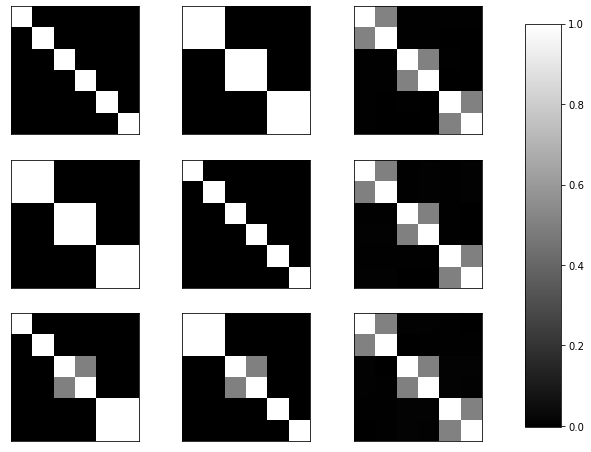

In [10]:
fig, ax = plt.subplots(3,3, figsize=(10,8));

colormap = 'gray';

# simulation 1
ax[0,0].imshow(corr_from_cov(bs_cov_mat_1),cmap=colormap);
# ax1.set_title('Between-Person \nCorrelation')
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])

ax[0,1].imshow(corr_from_cov(ws_cov_mat_1),cmap=colormap);
# ax2.set_title('Within-Person \nCorrelation')
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])

im = ax[0,2].imshow(corr_1,cmap=colormap);
# ax3.set_title('Observed Cross-sectional \nCorrelation')
ax[0,2].set_xticks([])
ax[0,2].set_yticks([])

# simulation 2
ax[1,0].imshow(corr_from_cov(bs_cov_mat_2),cmap=colormap);
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])

ax[1,1].imshow(corr_from_cov(ws_cov_mat_2),cmap=colormap);
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])

ax[1,2].imshow(corr_2,cmap=colormap);
ax[1,2].set_xticks([])
ax[1,2].set_yticks([])

# simulation 3
ax[2,0].imshow(corr_from_cov(bs_cov_mat_3),cmap=colormap);
ax[2,0].set_xticks([])
ax[2,0].set_yticks([])

ax[2,1].imshow(corr_from_cov(ws_cov_mat_3),cmap=colormap);
ax[2,1].set_xticks([])
ax[2,1].set_yticks([])

ax[2,2].imshow(corr_3,cmap=colormap);
ax[2,2].set_xticks([])
ax[2,2].set_yticks([])

# color bar
fig.subplots_adjust(right=0.8);
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7]);
fig.colorbar(im, cax=cbar_ax);